### Heart Disease Prediction

This Project is to predict the heart disease for an patient with the help of data science model and given health attributes.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

age - age in years
sex - (1 = male; 0 = female)
cp - chest pain type
0: Typical angina: chest pain related decrease blood supply to the heart

1: Atypical angina: chest pain not related to heart

2: Non-anginal pain: typically esophageal spasms (non heart related)

3: Asymptomatic: chest pain not showing signs of disease

trestbps - resting blood pressure (in mm Hg on admission to the hospital)
anything above 130-140 is typically cause for concern

chol - serum cholestoral in mg/dl

serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes

restecg - resting electrocardiographic results
0: Nothing to note

1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat

2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest
looks at stress of heart during excercise unhealthy heart will stress more
slope - the slope of the peak exercise ST segment

0: Upsloping: better heart rate with excercise (uncommon)

1: Flatsloping: minimal change (typical healthy heart)

2: Downslopins: signs of unhealthy heart

ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)

thal - thalium stress result
1,3: normal

6: fixed defect: used to be defect but ok now

7: reversable defect: no proper blood movement when excercising

target - have disease or not (1=yes, 0=no) (= the predicted attribute)

Note: No personal identifiable information (PPI) can be found in the dataset.

In [1]:
#importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#To display the plots inside the notebook
%matplotlib inline                

#importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Importing Model Evalutions
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import plot_roc_curve


In [2]:
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#Exploratory Data Analysis(EDA)
heart_disease.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

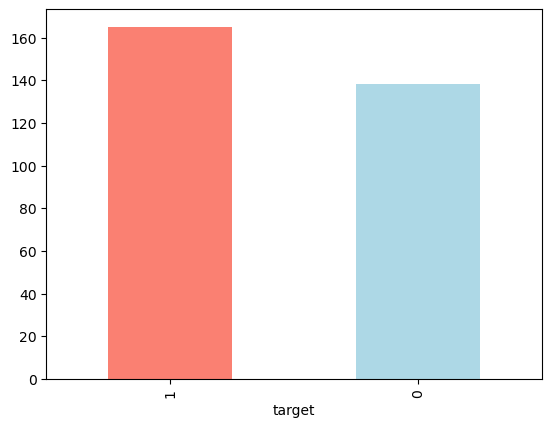

In [5]:
heart_disease.target.value_counts().plot(kind="bar",color=['Salmon','lightblue']);


In [6]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
#Finding Frequency according to Gender
heart_disease.sex.value_counts()


sex
1    207
0     96
Name: count, dtype: int64

In [9]:
#Comparing the Gender with Target column
pd.crosstab(heart_disease.sex,heart_disease.target)

target,0,1
sex,,
0,24,72
1,114,93


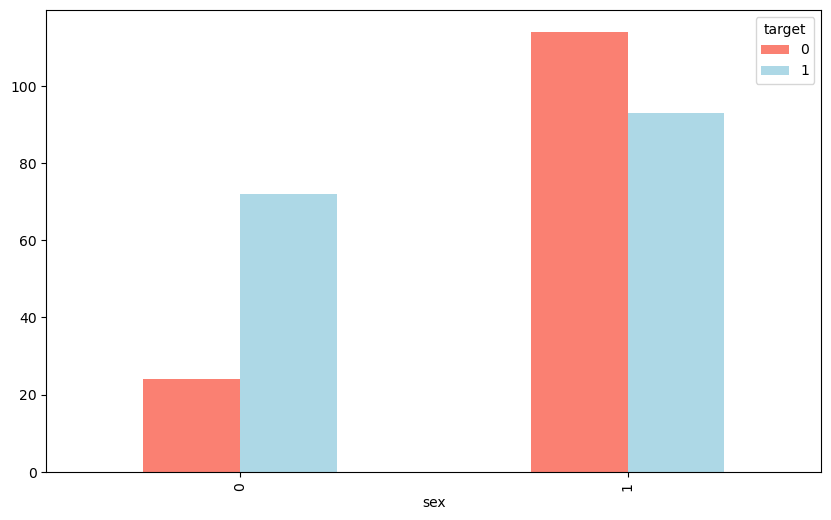

In [10]:
#visualize the info
pd.crosstab(heart_disease.sex,heart_disease.target).plot(kind="bar",figsize=(10,6),
                                                         color=['Salmon','lightblue']);

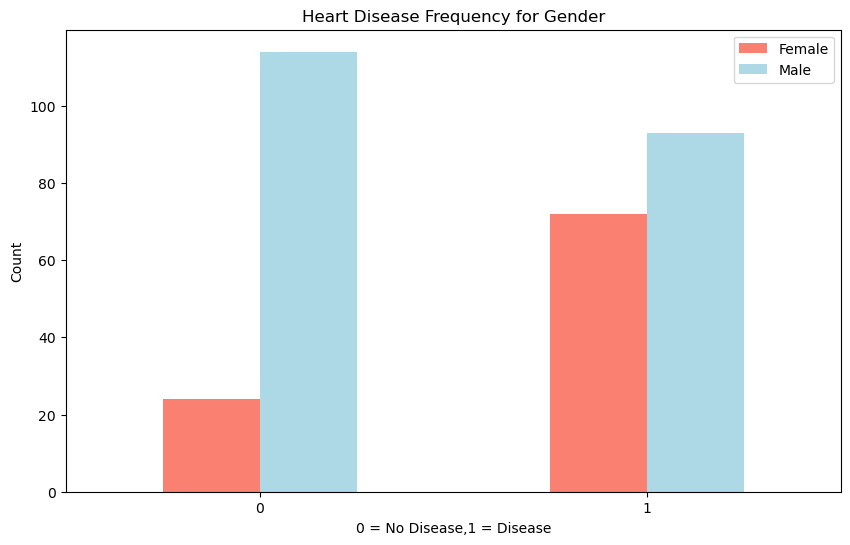

In [11]:
#plotting the value with attributes 
pd.crosstab(heart_disease.target,heart_disease.sex).plot(kind="bar",figsize=(10,6),
                                                          color=['salmon','lightblue']);
plt.title("Heart Disease Frequency for Gender")
plt.xlabel("0 = No Disease,1 = Disease")
plt.ylabel("Count")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

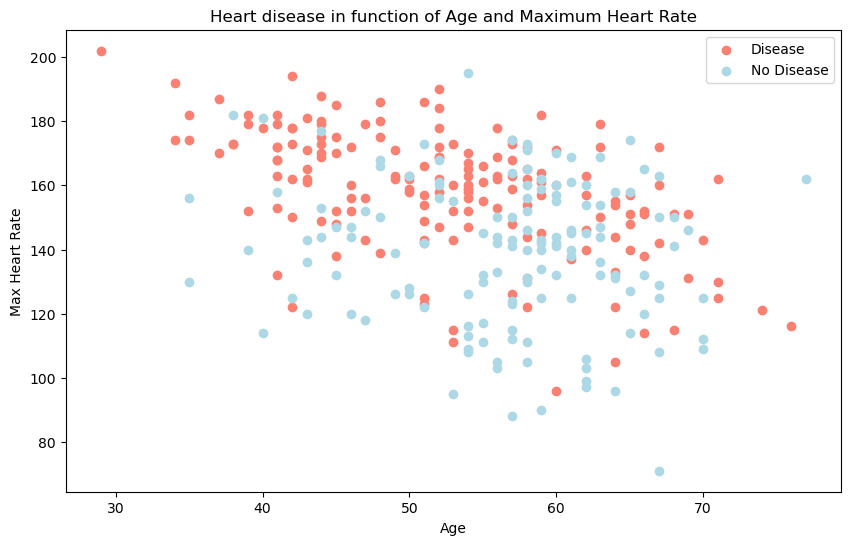

In [12]:
#comparing age with maximum heart rate 
#pd.crosstab(heart_disease.age,heart_disease.thalach)
plt.figure(figsize=(10,6))
plt.scatter(heart_disease.age[heart_disease.target==1],
            heart_disease.thalach[heart_disease.target==1],
            c="Salmon")
plt.scatter(heart_disease.age[heart_disease.target==0],
            heart_disease.thalach[heart_disease.target==0],
            c="lightblue")
plt.title("Heart disease in function of Age and Maximum Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease","No Disease"])
plt.ylabel("Max Heart Rate");



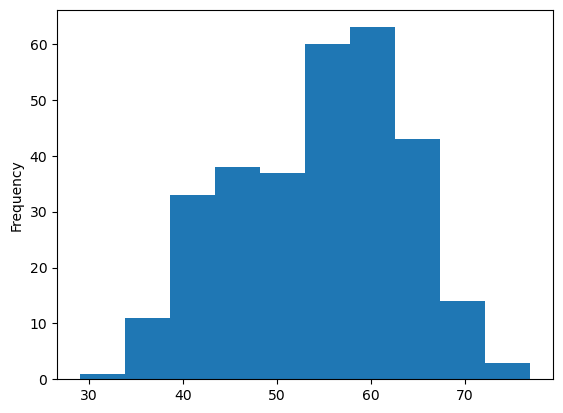

In [13]:
# To get the distribution plot the age on histogram
heart_disease.age.plot.hist();

Heart Disease frequency per chest pain

In [14]:
pd.crosstab(heart_disease.cp,heart_disease.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


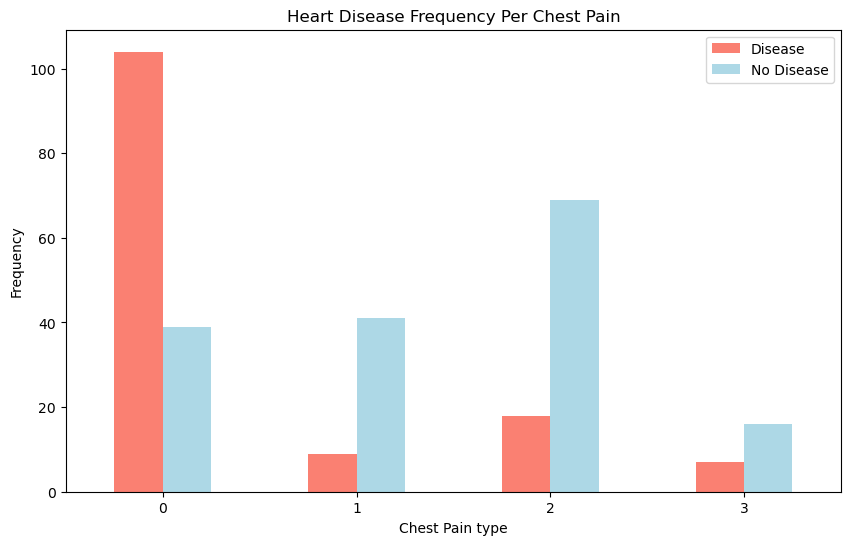

In [15]:
#visulalize the data in graph
pd.crosstab(heart_disease.cp,heart_disease.target).plot(kind="bar",
                                                        figsize=(10,6),
                                                         color=["Salmon","lightblue"])
#Adding atrributes 
plt.title("Heart Disease Frequency Per Chest Pain")
plt.xlabel("Chest Pain type")
plt.ylabel("Frequency")
plt.legend(["Disease","No Disease"])
plt.xticks(rotation=0);

1 cp - chest pain type

    0: Typical angina: chest pain related decrease blood supply to the heart

    1: Atypical angina: chest pain not related to heart

    2: Non-anginal pain: typically esophageal spasms (non heart related)

    3: Asymptomatic: chest pain not showing signs of disease

Corelation between Independent Values

In [16]:
corr_matrix=heart_disease.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


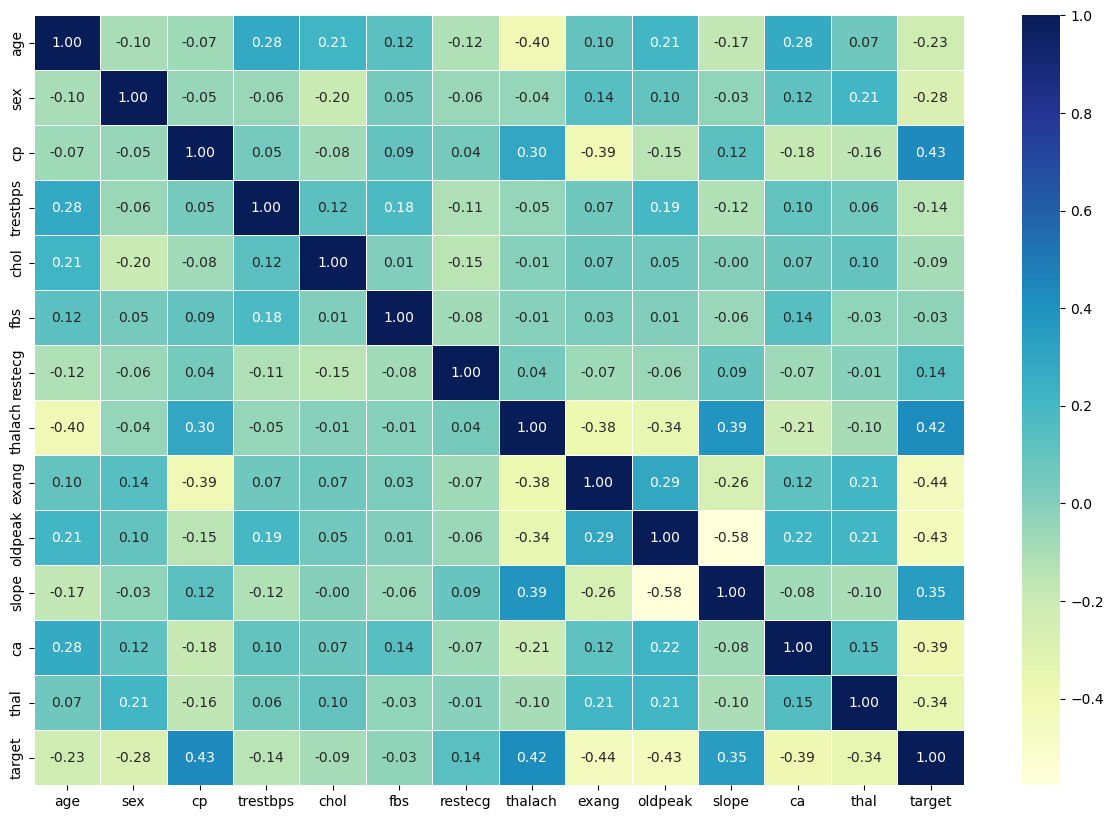

In [17]:
#Corelation Matrix on heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt=".2f",
            cmap="YlGnBu");

##### Modeling

Target is to achieve 95% accuracy

In [18]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
#Converting the data into features and lables
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)



###### Using the Models

1. Logistic Regression - LogisticRegression()

2. K-Nearest Neighbors - KNeighboursClassifier()

3. RandomForest - RandomForestClassifier()

In [20]:
#Putting all models in dictionary
models={"KNN":KNeighborsClassifier(),
        "Logistic Regression":LogisticRegression(),
        "Random Forest":RandomForestClassifier()}

def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    #Random seed for reproducible results
    np.random.seed(42)
    #Making the list to keep the model scores
    model_scores={}
    
    #Fitting the mdoel using loop
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

    
    

In [21]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

2024-02-21 03:38:20,314 [36230] WARNING  py.warnings:109: [JupyterRequire] /Users/onkarkulkarni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)

2024-02-21 03:38:36,024 [36230] WARNING  py.warnings:109: [JupyterRequire] /Users/onkarkulkarni/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
  

{'KNN': 0.6557377049180327,
 'Logistic Regression': 0.7868852459016393,
 'Random Forest': 0.8032786885245902}

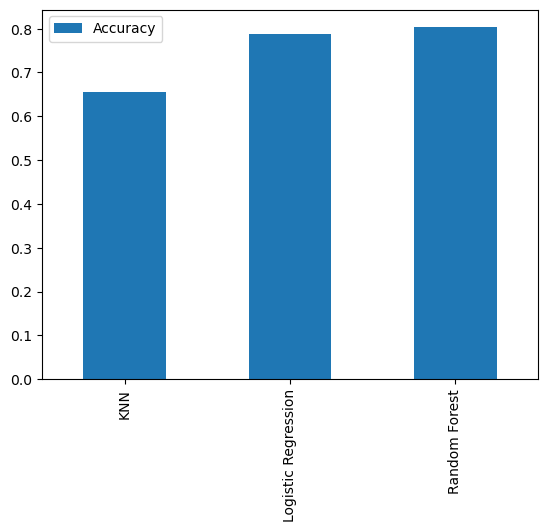

In [22]:
#Visulalise the data in the form of Graph
model_compare=pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.T.plot.bar();

### Hyperparameter tuning and cross-validation¶

###### Tune the KNN Model 

In [23]:
#Creating the list of train and test scores
train_scores=[]
test_scores=[]

#Creating list of n values for KNN
neighbors=range(1,21)

#Set up the algorithm
KNN=KNeighborsClassifier()

#Loop through neighbor value

for i in neighbors:
    KNN.set_params(n_neighbors =i)
    KNN.fit(X_train,y_train)
    #update the training score in list
    train_scores.append(KNN.score(X_train,y_train))
    #update the testing score in list
    test_scores.append(KNN.score(X_test,y_test))
    



2024-02-21 03:41:57,674 [36230] WARNING  py.warnings:109: [JupyterRequire] /Users/onkarkulkarni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)

2024-02-21 03:41:57,686 [36230] WARNING  py.warnings:109: [JupyterRequire] /Users/onkarkulkarni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavi

2024-02-21 03:41:57,754 [36230] WARNING  py.warnings:109: [JupyterRequire] /Users/onkarkulkarni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)

2024-02-21 03:41:57,759 [36230] WARNING  py.warnings:109: [JupyterRequire] /Users/onkarkulkarni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavi

2024-02-21 03:41:57,824 [36230] WARNING  py.warnings:109: [JupyterRequire] /Users/onkarkulkarni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)

2024-02-21 03:41:57,830 [36230] WARNING  py.warnings:109: [JupyterRequire] /Users/onkarkulkarni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavi

2024-02-21 03:41:57,891 [36230] WARNING  py.warnings:109: [JupyterRequire] /Users/onkarkulkarni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)



In [54]:
train_scores

[1.0,
 0.8057851239669421,
 0.7892561983471075,
 0.7975206611570248,
 0.7851239669421488,
 0.768595041322314,
 0.768595041322314,
 0.743801652892562,
 0.7272727272727273,
 0.7272727272727273,
 0.7520661157024794,
 0.71900826446281,
 0.7355371900826446,
 0.7231404958677686,
 0.7520661157024794,
 0.731404958677686,
 0.6983471074380165,
 0.7148760330578512,
 0.7024793388429752,
 0.7231404958677686]

Maximum KNN scores on test data:67.21%


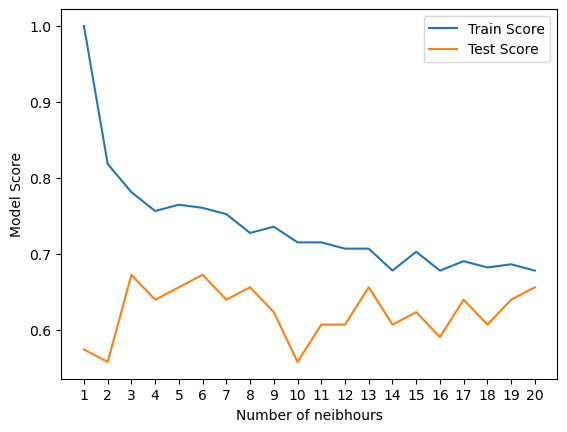

In [24]:
#Visualise the KNN scores
plt.plot(neighbors,train_scores,label="Train Score")
plt.plot(neighbors,test_scores,label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neibhours")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN scores on test data:{max(test_scores)*100:.2f}%")


In [26]:
#Tunning the Model with RandomizedserachCV

#taking different logistic regression parameters
log_reg_grid={"C": np.logspace(-4,4,20),
              "solver":["liblinear"]}

#Different RandomforestClassifier hyperparameters
rf_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_leaf":np.arange(1,20,2),
         "min_samples_split":np.arange(2,20,2)}


Using RandomizedSearchCV for LogisticRegression Model

In [27]:
#Setpup Random seed
np.random.seed(42)

#setup random hyperparameters for logisticRegression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)

#Fit Random hyperparameter seach model
rs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [28]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [29]:
rs_log_reg.score(X_test,y_test)

0.7868852459016393

In [30]:
#Tuning the model with GridSearchCV
gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)
gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [31]:
gs_log_reg.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [32]:
#EValuate the Model
gs_log_reg.score(X_test,y_test)

0.7868852459016393

##### Evaluating Classification Model beyond Accuracy

. ROC curve and AUC score - plot_roc_curve()

. Confusion matrix - confusion_matrix()

. Classification report - classification_report()

. Precision - precision_score()

. Recall - recall_score()

. F1-score - f1_score()

2024-02-21 03:43:52,449 [36230] WARNING  py.warnings:109: [JupyterRequire] /Users/onkarkulkarni/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)



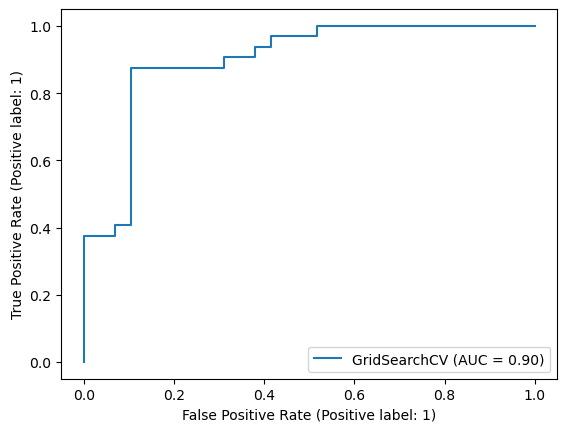

In [33]:
#Import ROC Curve funtion from scikit learn
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gs_log_reg,X_test,y_test);

In [34]:
#Make Predicion on Test Data
y_preds=gs_log_reg.predict(X_test)

y_preds

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0])

In [35]:
#Confustion Matrix
print(confusion_matrix(y_test,y_preds))


[[18 11]
 [ 2 30]]


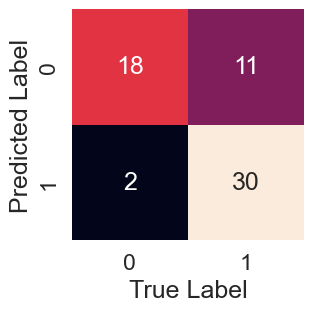

In [36]:
#Visualise the Confusion Martix 
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True,
                   cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

plot_conf_mat(y_test,y_preds)

In [37]:
#Show Classification report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.90      0.62      0.73        29
           1       0.73      0.94      0.82        32

    accuracy                           0.79        61
   macro avg       0.82      0.78      0.78        61
weighted avg       0.81      0.79      0.78        61

